In [48]:
import pandas as pd

In [49]:
import pandas as pd
df=pd.read_csv('breast-cancer.csv')

In [50]:
df.shape

(569, 33)

In [51]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [54]:
X.shape

(569, 32)

In [55]:
X.isna().sum()


id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [56]:
X = X.drop(columns=['Unnamed: 32'])

In [57]:
X.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [58]:
Y.shape

(569,)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)


In [60]:
from sklearn.feature_selection import f_classif

# Compute F-statistic and p-values for each feature
F_statistic, p_values = f_classif(X, Y)

# Create a DataFrame to display the F-statistics and p-values for each feature
f_statistic_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': F_statistic,
    'p_values': p_values
})

# Sort the DataFrame by F-statistic in descending order
f_statistic_df_sorted = f_statistic_df.sort_values(by='F-statistic', ascending=False)

# Display the sorted results
print(f_statistic_df_sorted)


                    Feature  F-statistic       p_values
28     concave points_worst   964.385393  1.969100e-124
23          perimeter_worst   897.944219  5.771397e-119
8       concave points_mean   861.676020  7.101150e-116
21             radius_worst   860.781707  8.482292e-116
3            perimeter_mean   697.235272  8.436251e-101
24               area_worst   661.600206   2.828848e-97
1               radius_mean   646.981021   8.465941e-96
4                 area_mean   573.060747   4.734564e-88
7            concavity_mean   533.793126   9.966556e-84
27          concavity_worst   436.691939   2.464664e-72
6          compactness_mean   313.233079   3.938263e-56
26        compactness_worst   304.341063   7.069816e-55
11                radius_se   268.840327   9.738949e-50
13             perimeter_se   253.897392   1.651905e-47
14                  area_se   243.651586   5.895521e-46
22            texture_worst   149.596905   1.078057e-30
25         smoothness_worst   122.472880   6.575

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# 1. Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [63]:
# 2. Feature selection
selector = SelectKBest(score_func=f_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [64]:

# # Get the selected feature columns (boolean mask)
selected_columns = X.columns[selector.get_support()]

# # Print the names of the selected features
print("Selected Features:", selected_columns)

Selected Features: Index(['radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')


In [65]:
# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [66]:
# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [67]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [68]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [69]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9649122807017544
Confusion Matrix:
[[105   3]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



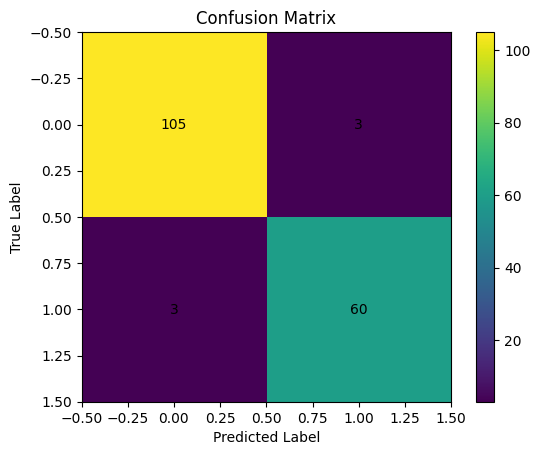

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# Show values inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

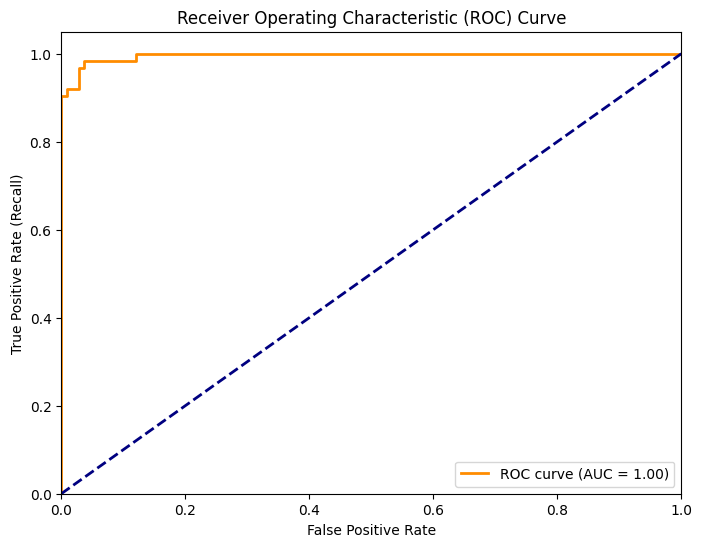

AUC (Area Under the Curve): 1.00


In [72]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Optionally, you can print the AUC value
print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

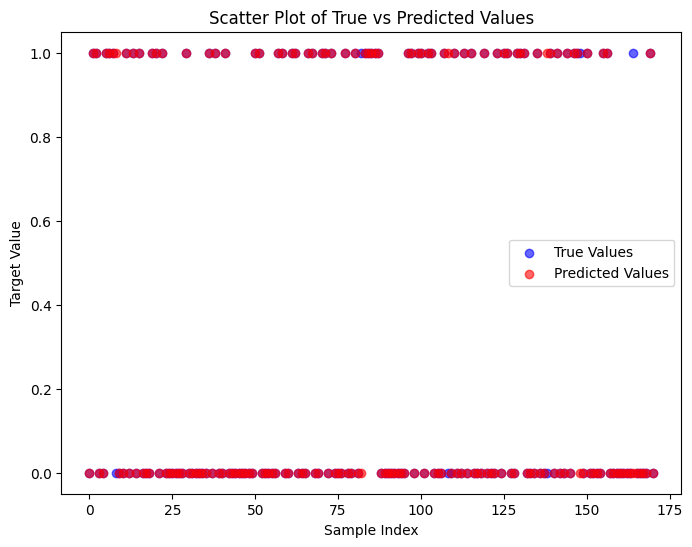

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend()
plt.show()

#CHi2 test

In [74]:
# 1. Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [75]:
# 2. Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Select
selector = SelectKBest(score_func=chi2, k=7)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [77]:
# Feature names
selected_columns = X_train.columns[selector.get_support()]
print("Selected Features:", selected_columns)

Selected Features: Index(['concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [78]:
# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_selected, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [79]:
y_pred = model.predict(X_test_selected)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [81]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9415204678362573
Confusion Matrix:
[[105   3]
 [  7  56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



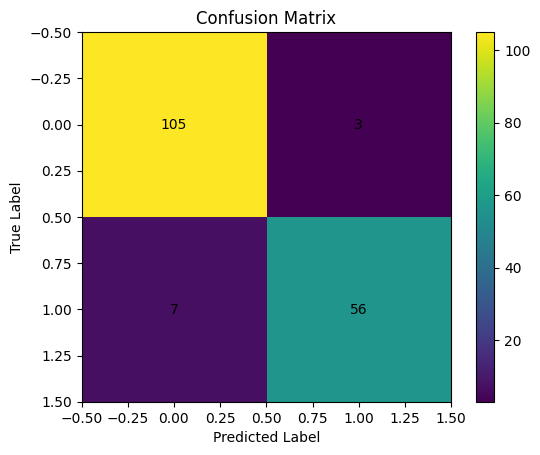

In [82]:


cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show values inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

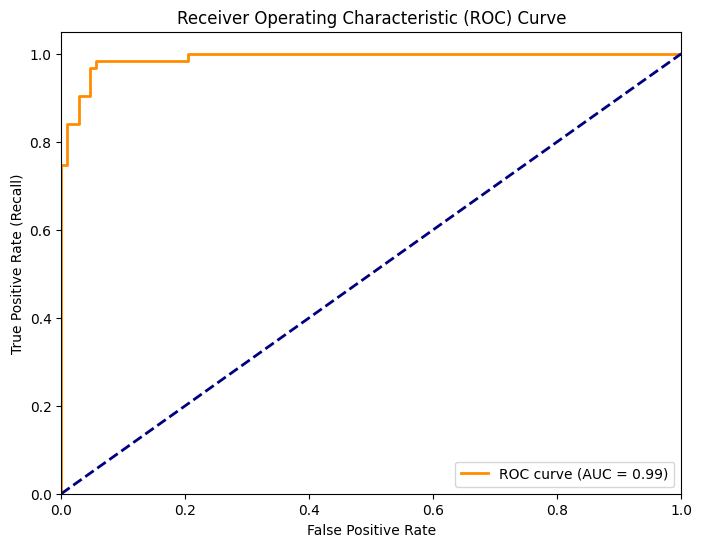

AUC (Area Under the Curve): 0.99


In [84]:
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Optionally, you can print the AUC value
print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

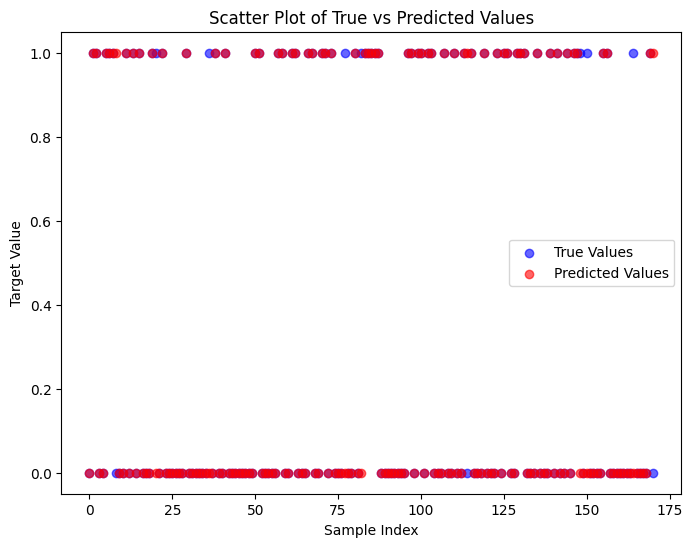

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend()
plt.show()

mutual_info_classif

In [86]:
# 1. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# 2. Feature selection (NO scaling here)
selector = SelectKBest(score_func=mutual_info_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]
print("Selected Features:", selected_columns)

# 3. Scaling (ONLY because Logistic Regression needs it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


Selected Features: Index(['perimeter_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [ ]:
#4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [88]:
y_pred = model.predict(X_test_scaled)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [90]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9649122807017544
Confusion Matrix:
[[105   3]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



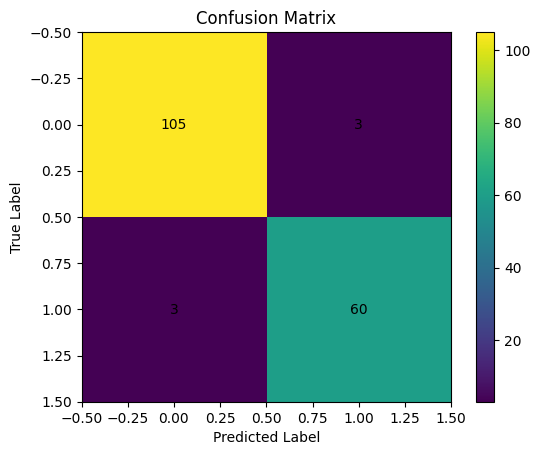

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show values inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


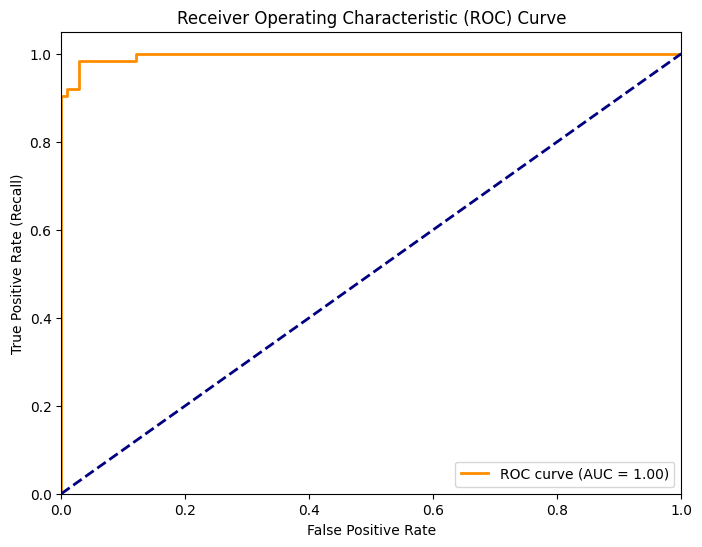

AUC (Area Under the Curve): 1.00


In [92]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Optionally, you can print the AUC value
print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

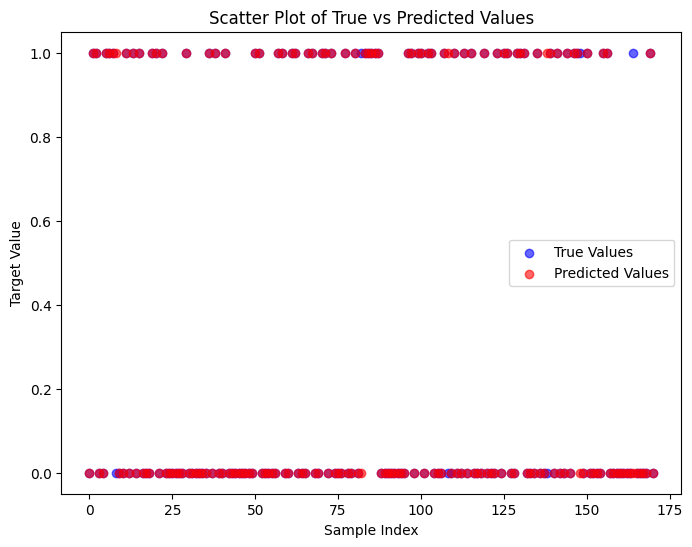

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend()
plt.show()